In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt

import seaborn as sns
from numpy import ndarray

%load_ext version_information


The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
        'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols,
                     index_col=False)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 3. Implementierung der Hauptkomponentenanalyse

Wir beginnen zunächst mit einem schon bekannten Datensatz *Boston Housing*. Zur praktischen Berechnung der Hauptkomponentenanalyse gehen Sie folgt vor:

1. Gegeben eine Menge von $n$ $d$-dimensionalen Datenpunkten $\mathbf{x}_i$, berechnen Sie zuerst deren Mittelwert $\boldsymbol{\mu}_x = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ für jedes einzelne Merkmal und ziehen ihn von allen Datenpunkten ab (Zentrierung).
2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.
3. Kopieren Sie alle $\mathbf{x}_i$ als Reihen in eine $n \times d$-Matrix $X$, die sog. Daten- oder Designmatrix.
4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von $X$ (z.B. mit `numpy.linalg.svd()`): $$ X = UDV^\top $$
Wer nicht weiß, was eine Singuälrwertzerlegung ist oder macht, der lese bitte in den entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit `numpy.linalg.eig()`), diese Methode ist aber meist aufwändiger und numerisch weniger stabil.
5. Die ersten $r$ Basisvektoren $\mathbf{q}_i$  (d.h die ersten $r$ Hauptkomponenten) sind die ersten $r$ Spalten der orthogonalen $d \times d$-Matrix $V$.
6. Die Projektionen $a_i$ der Daten $\mathbf{x}_i$ auf die ersten $r$ Basisvektoren $\mathbf{q}_i$ (d.h die neuen Variablenwerte im neuen Koordinatensystem) sind die die ersten $r$ Spalten der $n \times d$-Matrix $UD$.
7. Die Standardabweichungen entlang der Hauptkomponenten $\mathbf{q}_i$ sind die Diagonalelemente der Diagonalmatrix $D$ geteilt durch $\sqrt{n - 1}$.

Aufgaben:

#### a) Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.

In [4]:
data = boston

In [5]:
def pca(data: pd.DataFrame):
    df_normalized = data.apply(lambda col: col - col.mean())
    df_normalized = df_normalized.apply(lambda col: col / col.var())

    X: np.ndarray = df_normalized.to_numpy()
    U, D, Vt = np.linalg.svd(X, full_matrices=False)
    D_matrix = np.zeros((U.shape[0], U.shape[1]), dtype=float)
    np.fill_diagonal(D_matrix, D)

    UD = U * D_matrix

    V = Vt.transpose()

    A = df_normalized @ V
    return UD, D, V, A


b) Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz *Boston Housing*. Lassen Sie dabei die Variable `TGT` weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von $D$ müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten $n$ Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

In [6]:

boston_without_tgt = boston.drop(columns="TGT")

UD, D, V, df_a = pca(boston_without_tgt)

df_v = pd.DataFrame(V)
df_ud = pd.DataFrame(UD)
df_d = pd.DataFrame(D)


In [11]:
df_a.var()

0     74.990772
1     15.380372
2      1.828321
3      0.189381
4      0.087465
5      0.013858
6      0.007447
7      0.006531
8      0.003883
9      0.000856
10     0.000401
11     0.000089
12     0.000004
dtype: float64

c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

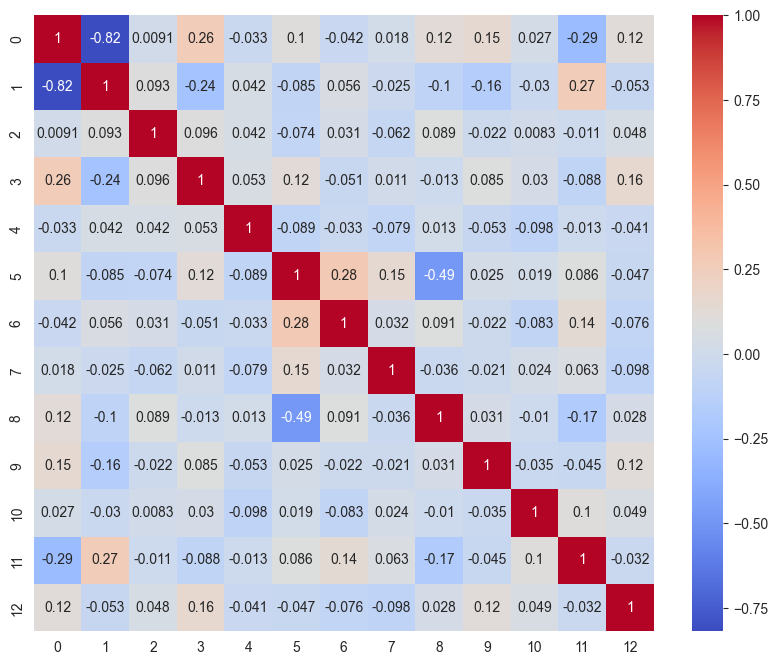

In [12]:
corr_matrix = df_a.corr(method="spearman")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

d) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

In [23]:
df_qi3 = pd.DataFrame(np.dot(boston_without_tgt, df_v.iloc[:, :3]))
corr_matrix_qi3 = df_qi3.corr(method="spearman")

corr_matrix_qi3

,0,1,2
0,1.000000,-0.741997,-0.798951
1,-0.741997,1.000000,0.843558
2,-0.798951,0.843558,1.000000


e. Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

Text(0, 0.5, '2. Hauptkomponenten')

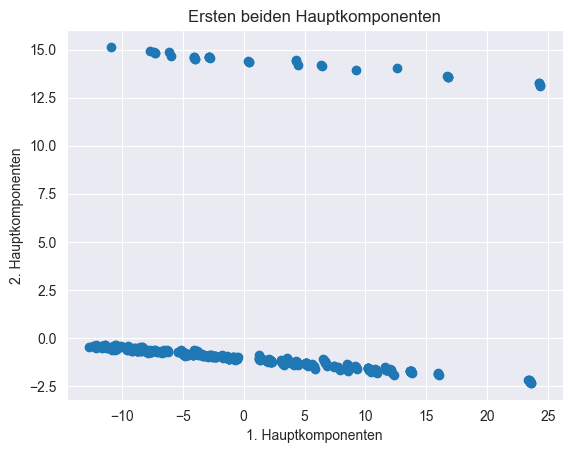

In [24]:
plt.scatter(df_a[0], df_a[1])
plt.title("Ersten beiden Hauptkomponenten")
plt.xlabel("1. Hauptkomponenten")
plt.ylabel("2. Hauptkomponenten")

In [10]:
pip
install
version - information

NameError: name 'pip' is not defined

In [14]:
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [13]:
%version_information numpy, pandas

Software versions
Python 3.12.7 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.28.0
OS Windows 11 10.0.22631 SP0
numpy 2.1.2
pandas 2.2.3
Wed Oct 23 21:34:44 2024 Mitteleuropäische Sommerzeit